Topics covered:
- Tokenization
    - word
    - sentence
- Text Normalization
    - stemming
    - lemmatization
- StopWords
- Name Entity Recognition
***

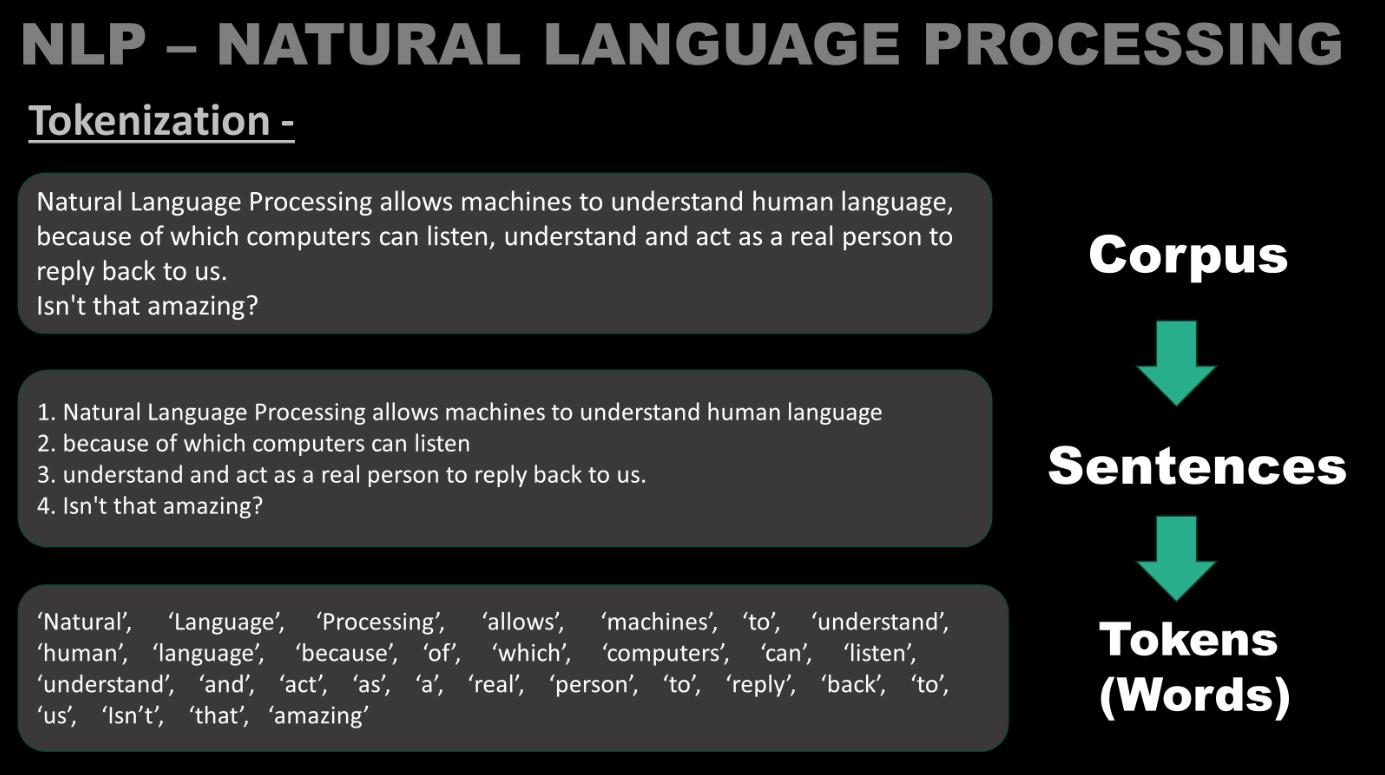

# Tokenization

Tokenization refers to break down the text into smaller units. It entails splitting paragraphs into sentences and sentences into words. It is one of the initial steps of any NLP pipeline.

These tokens can be Words or Sentence

Few Terminology
- Corpus : A large collection of sentences. (plural: Corpora)
- Token : The smallest unit in corpus.

In [2]:
%pip install nltk

In [4]:
import nltk  # Imports the Natural Language Toolkit library for NLP tasks
# nltk.download('punkt')  # For tokenization

# Try to find the 'punkt' tokenizer model in NLTK data
try:
    nltk.data.find('tokenizers/punkt_tab')  # Checks if 'punkt' tokenizer is already downloaded
except LookupError:  # If 'punkt' model is not found, execute this block
    nltk.download('punkt_tab')  # Downloads the 'punkt' tokenizer model required for tokenization

In [5]:
SINGLELINE =  'Test case'
print(SINGLELINE)

Test case


In [6]:
text = """The quick brown fox jumps over the lazy dog.
Natural Language Processing allows machines to understand human language.
Isn't that amazing? Nope We must try hard"""  # Defines a multi-line sample text string for tokenization demonstrations

### Sentence Tokenize


In [7]:
from nltk.tokenize import sent_tokenize  # Imports the sent_tokenize function to split text into sentences

In [ ]:
sentences=sent_tokenize(text)  # Tokenizes the text into individual sentences and stores them in a list
print(sentences)  # Prints the entire list of sentences
for sentence in sentences:  # Iterates through each sentence in the list
    print(sentence)  # Prints each individual sentence on a new line

['The quick brown fox jumps over the lazy dog.', 'Natural Language Processing allows machines to understand human language.', "Isn't that amazing?", 'Nope We must try hard']
The quick brown fox jumps over the lazy dog.
Natural Language Processing allows machines to understand human language.
Isn't that amazing?
Nope We must try hard


### Word tokenize

In [8]:
from nltk.tokenize import word_tokenize  # Imports the word_tokenize function to split text into individual words
words=word_tokenize(text)  # Tokenizes the text into individual words/tokens and stores them in a list
print(words)  # Prints the entire list of words/tokens

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.', 'Natural', 'Language', 'Processing', 'allows', 'machines', 'to', 'understand', 'human', 'language', '.', 'Is', "n't", 'that', 'amazing', '?', 'Nope', 'We', 'must', 'try', 'hard']


## 🤓 Fun Fact

## Wordnet
WordNet is a lexical database of semantic relations between words that links words into semantic relations including synonyms, hyponyms, and meronyms.
***
- Your Own Personal Dictionary. But A SMART one.
- It let you know meaning of the word, synonymns, antonymns etc.
***

In [9]:
# Lexicon Example using WordNet
from nltk.corpus import wordnet  # Imports wordnet corpus which contains lexical database of semantic relations
try:  # Start a try block to check if wordnet data exists
    nltk.data.find('corpora/wordnet')  # Checks if wordnet corpus is already downloaded
except LookupError:  # If wordnet corpus is not found, execute this block
    nltk.download('wordnet')  # Downloads the wordnet corpus data

# Lexicon Example using WordNet
from nltk.corpus import wordnet  # Imports wordnet corpus which contains lexical database of semantic relations

syns = wordnet.synsets("learning")  # Retrieves all synsets (synonym sets) for the word "learning"
print("\nLexicon Entry for 'learning':")  # Prints a header message
print(syns[0].definition())  # Prints the definition of the first synset for "learning"

[nltk_data] Downloading package wordnet to /root/nltk_data...



Lexicon Entry for 'learning':
the cognitive process of acquiring skill or knowledge


In [10]:
wordnet.synonyms("girl")  # Retrieves and returns all synonyms for the word "girl" from WordNet database

[['fille', 'miss', 'missy', 'young_lady', 'young_woman'],
 ['female_child', 'little_girl'],
 ['daughter'],
 ['girlfriend', 'lady_friend'],
 []]

***
# Stemming

Stemming is the process of reducing a word to its root or base form.
It may not result in an actual valid word.

Example: "running", "runs", and "ran" may all be reduced to "run" or "run" could become "runn" using certain stemmers.

# Lemmatization
Lemmatization is also the process of reducing a word to its base form (lemma).
However, it always returns a valid word, using a dictionary and part-of-speech (POS) tagging.
Example: "running" becomes "run", "better" becomes "good".


# Then What's The difference? 🤔
1. Stemming is faster but less accurate.
2. Lemmatization is slower but more accurate and meaningful.
3. Stemming may produce non-existent words; Lemmatization always returns real words.

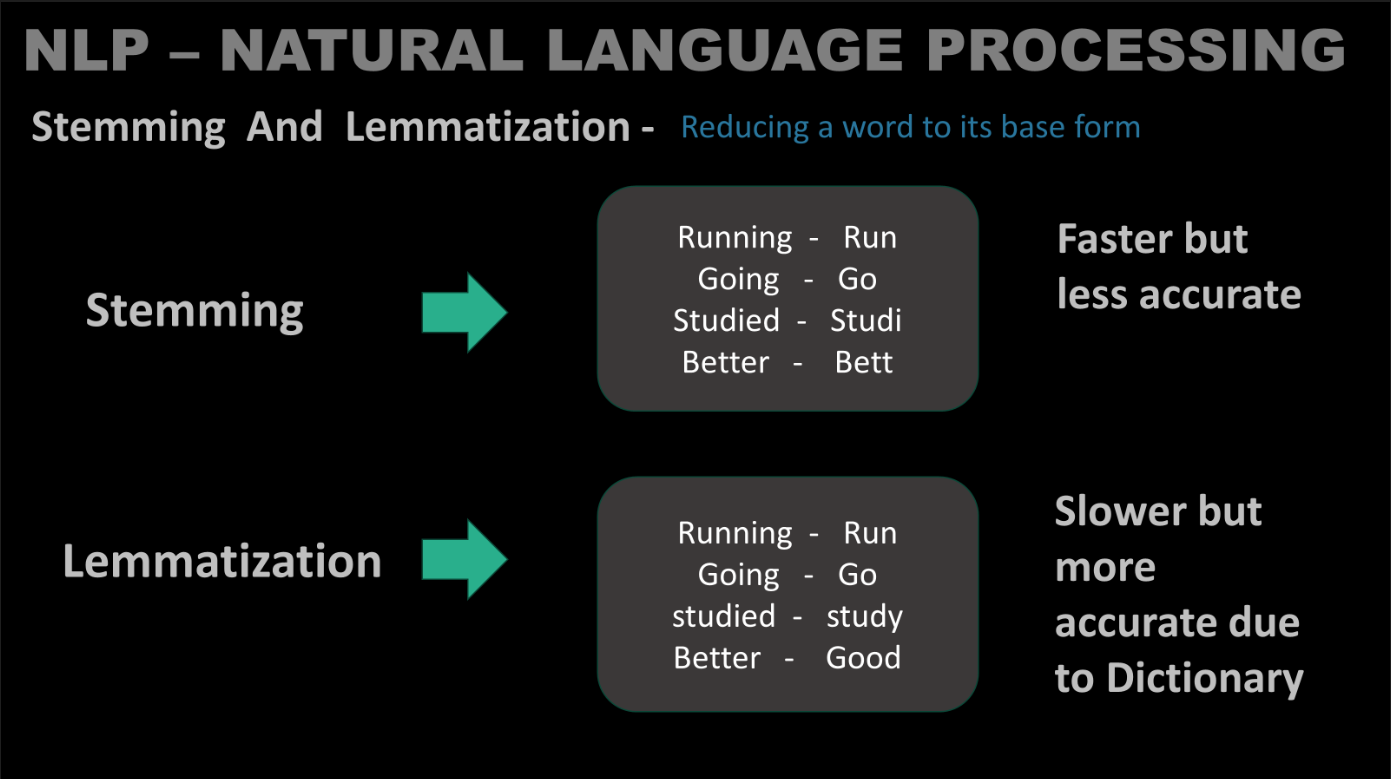

In [15]:
import nltk  # Imports the Natural Language Toolkit library

nltk.download('punkt')  # Downloads the 'punkt' tokenizer for sentence and word tokenization
nltk.download('wordnet')  # Downloads the WordNet corpus for semantic relationships
nltk.download('omw-1.4')  # Downloads the Open Multilingual WordNet for multiple language support

# Imports PorterStemmer for performing stemming operations
from nltk.stem import PorterStemmer    # stemming
# Imports WordNetLemmatizer for performing lemmatization operations
from nltk.stem import WordNetLemmatizer   #lemmatizing
from nltk.corpus import wordnet  # Imports wordnet corpus for semantic relationship lookups

# Creates an instance of the PorterStemmer class for stemming words
stemmer = PorterStemmer()
# Creates an instance of the WordNetLemmatizer class for lemmatizing words
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [13]:
sampleText=" When i am running, i feel better than before. Too much studying just not me."  # Defines a sample text string for demonstrating stemming and lemmatization

In [16]:
words = nltk.word_tokenize(sampleText)  # Tokenizes the sample text into individual words/tokens
print("\nStemming Results:")  # Prints a header message for stemming results
for word in words:  # Iterates through each word in the tokenized list
    print(f"{word} --> {stemmer.stem(word)}")  # Prints each word and its stemmed form side by side


Stemming Results:
When --> when
i --> i
am --> am
running --> run
, --> ,
i --> i
feel --> feel
better --> better
than --> than
before --> befor
. --> .
Too --> too
much --> much
studying --> studi
just --> just
not --> not
me --> me
. --> .


In [18]:
print("\nLemmatization Results:")  # Prints a header message for lemmatization results
for word in words:  # Iterates through each word in the tokenized list
    print(f"{word} --> {lemmatizer.lemmatize(word)}")  # Prints each word and its lemmatized form side by side


Lemmatization Results:
When --> When
i --> i
am --> am
running --> running
, --> ,
i --> i
feel --> feel
better --> better
than --> than
before --> before
. --> .
Too --> Too
much --> much
studying --> studying
just --> just
not --> not
me --> me
. --> .


In [19]:
# Words that show difference between stemming and lemmatization
print("\nStrong Examples Showing Differences:")  # Prints a header message
sample_words = ["running", "flies", "better", "flying", "studies", "feet", "ate"]  # Creates a list of sample words to demonstrate differences
for word in sample_words:  # Iterates through each word in the sample list
    stemmed = stemmer.stem(word)  # Applies stemming to the word and stores the result
    lemmatized = lemmatizer.lemmatize(word)  # Applies lemmatization to the word and stores the result
    print(f"{word} --> Stem: {stemmed}, Lemma: {lemmatized}")  # Prints the original word with both stemmed and lemmatized forms


Strong Examples Showing Differences:
running --> Stem: run, Lemma: running
flies --> Stem: fli, Lemma: fly
better --> Stem: better, Lemma: better
flying --> Stem: fli, Lemma: flying
studies --> Stem: studi, Lemma: study
feet --> Stem: feet, Lemma: foot
ate --> Stem: ate, Lemma: ate


### 💡💡 Brainy Bites

## RegexpStemmer

RegexpStemmer is a rule-based stemmer in NLTK that uses regular expressions to strip word suffixes. Unlike PorterStemmer or LancasterStemmer

In [20]:
# Applying RegexpStemmer

from nltk.stem import RegexpStemmer  # Imports the RegexpStemmer class for rule-based stemming using regex patterns
R_stem=RegexpStemmer("ing$|s$|e$|able$",min=4)  # Creates a RegexpStemmer that removes suffixes (ing, s, e, able) from words with minimum 4 characters
arg=['eats','geting',"disable"]  # Creates a list of sample words to apply the RegexpStemmer
for i in arg:  # Iterates through each word in the list
    print(R_stem.stem(i))  # Applies the RegexpStemmer to each word and prints the result

eat
get
dis


## SnowBallStemmer
It’s also called “Porter2” stemmer.
More advanced than PorterStemmer with better linguistic rules.
Supports multiple languages, unlike PorterStemmer (which only supports English).

In [21]:
from nltk.stem import SnowballStemmer  # Imports the SnowballStemmer class, a more advanced stemmer with support for multiple languages
Snowballstem=SnowballStemmer("english")  # Creates an instance of SnowballStemmer configured for English language
for  i in arg:  # Iterates through each word in the list
    print(i+"....."+Snowballstem.stem(i))  # Prints each word followed by its Snowball stemmed form

eats.....eat
geting.....gete
disable.....disabl


### Still Confused??🥲
### Here you go 😎 Full Comparison Table:
 | Method              | Key Feature                                                 | Returns Real Word? | Based on Rules or Dictionary? | Accuracy       | Language Support      |
 |---------------------|-------------------------------------------------------------|---------------------|-------------------------------|----------------|------------------------|
 | Porter Stemmer      | Oldest and simplest stemmer, chops suffixes                | ❌ (Not always)     | Rule-based                    | Low to Medium  | English only           |
 | Lemmatization       | Uses vocabulary + grammar (POS tagging) to get base word   | ✅ (Always)         | Dictionary-based              | High           | English (WordNet)      |
 | RegexpStemmer       | Applies custom regex rules (e.g., remove -ing, -ed, -s)    | ❌ (Usually not)    | Rule-based (regex)            | Low            | Depends on rules       |
| Snowball Stemmer    | More advanced than Porter, improved linguistic logic       | ❌ (Not always)     | Rule-based (refined)          | Medium to High | Multiple languages     |

***
## Stop Words
Stop words are common words that usually carry less meaning and are often removed from text data during preprocessing.
Examples include: "is", "and", "the", "a", "in", etc.
Removing them helps in focusing on more meaningful words in NLP tasks.

**How it removing them helps?**
- They occur frequently but add little information.
- Reducing them simplifies the dataset and improves model performance.
- Eliminating them reduces noise in the data.
- It helps in decreasing the size of the dataset.
- Enhances the efficiency of text classification and search-related tasks.

In [22]:
# Importing Required Libraries
import nltk  # Imports the Natural Language Toolkit library for NLP operations
from nltk.corpus import stopwords  # Imports stopwords corpus containing common words for various languages
from nltk.tokenize import word_tokenize  # Imports word_tokenize function to split text into words

# Download required NLTK data files
nltk.download('punkt')  # Downloads the 'punkt' tokenizer for sentence and word tokenization
nltk.download('stopwords')  # Downloads the stopwords corpus containing stop words for multiple languages

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
# Tokenize the text
words = word_tokenize(sampleText)  # Tokenizes the sample text into individual words/tokens

# Get English stopwords
stop_words = set(stopwords.words('english')) # Retrieves all English stopwords and converts them to a set for faster lookup

# Filter out stop words
filtered_words = [word for word in words if word.lower() not in stop_words]  # Creates a new list containing only words that are NOT in the stopwords set

print("\nOriginal Words:")  # Prints a header message
print(words)  # Prints the list of all tokenized words

print("\nFiltered Words (Stop Words Removed):")  # Prints a header message
print(filtered_words)  # Prints the list of words after removing stopwords


Original Words:
['When', 'i', 'am', 'running', ',', 'i', 'feel', 'better', 'than', 'before', '.', 'Too', 'much', 'studying', 'just', 'not', 'me', '.']

Filtered Words (Stop Words Removed):
['running', ',', 'feel', 'better', '.', 'much', 'studying', '.']


## Named Entity Recognition (NER)

**What is NER?**

Named Entity Recognition (NER) is the process of locating and classifying named entities in text into predefined categories such as:
- Person names
- Organizations
- Locations
- Dates
- Time expressions
- Monetary values

NER helps in understanding the meaning of text by identifying important nouns that have a specific meaning or role.

### Why is NER important?
- Helps extract structured information from unstructured text.
- Useful in applications like chatbots, search engines, recommendation systems, and summarization.
- Makes information retrieval more accurate.


In [24]:
import spacy  # Imports the spaCy library for advanced NLP tasks including Named Entity Recognition

# Load English model
nlp = spacy.load("en_core_web_sm")  # Loads the pre-trained English language model for spaCy

# Sample text
text = "Apple was founded by Steve Jobs in Cupertino in 1976."  # Defines a sample text for NER demonstration
# Try your own!

# Process the text
doc = nlp(text)  # Processes the text through the spaCy NLP pipeline to identify entities, tokens, and linguistic features

# Print named entities
for ent in doc.ents:  # Iterates through each named entity found in the document
    print(ent.text, "-", ent.label_)  # Prints the entity text and its corresponding label (e.g., PERSON, ORG, GPE, DATE)


### Output:
"""
Apple - ORG
Steve Jobs - PERSON
Cupertino - GPE
1976 - DATE
"""

Apple - ORG
Steve Jobs - PERSON
Cupertino - GPE
1976 - DATE


'\nApple - ORG\nSteve Jobs - PERSON\nCupertino - GPE\n1976 - DATE\n'

### Lets Test Your Knowledge








***
# 🥳🥳 Congrats Everyone we did it!!
Now you know a lot more than before you.
### You should pat your back. Coz i certainly am.

Thankyou for being a part of it.
Happy Creative Coding!!!
# 🤘🤘

